# Step 0: Single layer NN (Adaline)#

Adaptive Linear Neuron - uses a gradient descent optimization algorithm to learn the weight coefficients of the model. In every epoch(pass of the training set) we update the weight vector `w`. 

* Adaline has 1 input layer and 1 output layer. 
* We compute the gradient based on the whole training set and update the weights of the model by taking a step into the opposite direction of the gradient.
* We optimize the weights using the Sum of squared errors cost function. 
* We multiply the gradient by a learning rate.
* We use a threshold function(Heaviside function)to convert continuous-valued output into binary class labels for prediction. 


# Step 1: Multilayer NN(multi layer perceptron) #

* Has 3 layers - input, hidden, output layers.
* If a perceptron has more than 1 hidden layer, it is called a deep ANN.
* The more layers we add, the error gradients we calculate via backpropagation become increasingly small - this is called the vanishing gradient problem and is solved by pretraining deep NNs and is called deep learning.

## Activation of NN using Forward Propagation ##

* Start at i/p layer, forward propagate the patterns of training data through the network to generate an output.
* Calculate errors based on o/p. The error is one that we want to reduce via a cost function.
* Backpropate the error, find its dericate with respect to each weight in the network and update the model.
* Neurons in an MLP are like logistic regression units that return continuous values in the range of 0 to 1.
* MLP is an example of a feed forward ANN as each layer serves as the input to the next layer. 

## Activation function ## 

A function that takes the input signal and generates an output signal, but takes into account the threshold, is called an activation function. 
* If this function is too small, it limits the ability of a NN to learn. This is called saturating a NN.
* Rescale inputs in the 0.0-1.0 range because if the values are too small, computers have a tough time dealing with accuracy.

## Sigmoid function ##

The sigmoid function is also called the logistic function. It is `y = (1 / (1 + e^-x))`. Where e = 2.71828. Neurons take the input, sum them up, apply the sum to the sigmoid function which controls the output. 

## Backpropagation ##

We use the weights to propagate signals forward from the input to the output layers in a NN. We use the weights to also propagate error backwards from the output back into the network. This is called backpropagation.

# Key points #

* ** Inputs **: Scale input values to 0.01 to 0.99 range
* ** Ouputs **: Scale output values to 0.01 to 0.99 range
* ** Initial weights **: Weights are initialized by randomly sampling from a range that is roughly the **inverse of the square root of the number of links into the node. ** So if a node has 3 links into it, the initial weights should in the range of (1/sqrt(3)). Dont set weights to the same constant value(as the error is backpropagated based on the weights, and if it is equal the error will be split equally) and never to 0(this kills the ability to update the weights).

# Final equation: #

`Delta(Wjk) = alpha * Ek * sigmoid(Ok) * (1 - sigmoid(Ok)) . OTj`

Where Delta(Wjk) is the change in the weight which we will be applying to between j and k which can be the output-hidden layer or hiddne-input layer, alpha is the learning rate, Ok is the signal into the next layer, OTj is the transpose of the of output from the previous layer.

# Step 2: Skeleton code to get ANN/MLP set up #

In [38]:
import numpy

# scipy.special for the sigmoid function expit()
import scipy.special

import matplotlib.pyplot
%matplotlib inline

In [39]:
# license: gplv2
# Neural Network class definition
class NeuralNetwork:
     
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # Set number of nodes in input, hidden and output layers.
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        '''
        Create network of nodes and links inluding link weights. Link weights are used for:

        - calculating the signal being sent forward
        - error being propagated backward. 

        Create 2 matrices:

        - matrix for weights of the links between input and hidden layers(size is hidden_nodes by input_nodes)
        - matring for weights of the links between hidden and output layers(size is output_nodes by hidden_nodes)
        '''
        # From input to hidden layer with size hnodes * inodes
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        
        # From hidden to output layer with size onode onode * hnodes
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))

        # Learning rate
        self.lr = learningrate
        
        # Activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
    
    
    '''
    This function has two parts:
    - Calculating the output akin to query()
    - Backpropagating the errors to inform how the link weights are refined
    '''
    def train(self, inputs_list, targets_list):
        '''
        Part 1: Calculating the output of the Neural Network 
        '''
        # Convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        # This line is the only additional part when comparing part 1 to query()
        targets = numpy.array(targets_list, ndmin = 2).T
        
        '''
        Calculate signals into hidden layer:
        - dot product of matrix of weights between input and hidden layer and the matrix of inputs.
        '''
        hidden_inputs = numpy.dot(self.wih, inputs)
        
        '''
        Calculate the signals emerging from hidden layer:
        - Apply sigmoid function(activation function) to signals emerging from hidden layer.
        '''
        hidden_outputs = self.activation_function(hidden_inputs)
        
        '''
        Calculate signals into final output layer:
        - dot product of matrix of weights between hidden and output layers and matrix of output of hidden layer
        '''
        final_inputs = numpy.dot(self.who, hidden_outputs)
        
        '''
        Calculate the signals emerging from final output layer:
        - apply sigmoid function to signals emerging from output layer
        '''
        final_outputs = self.activation_function(final_inputs)
        
        '''
        Part 2: 
        - compare calculated output with desired output by taking the difference
        - use this difference to quide updating of network weights
        '''
        # Output layer error is the difference between desired target and actual output.
        # Error for the weights between the hidden and output layers.
        output_errors = targets - final_outputs
        
        # Backpropagated error - hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        # Error for the weights between input and hidden layers.
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # Update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # Update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        

    '''
    query takes the input to a NN and returns the networks output
    '''
    def query(self, inputs_list):
        # Convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        '''
        Calculate signals into hidden layer:
        - dot product of matrix of weights between input and hidden layer and the matrix of inputs.
        '''
        hidden_inputs = numpy.dot(self.wih, inputs)
        
        '''
        Calculate the signals emerging from hidden layer:
        - Apply sigmoid function(activation function) to signals emerging from hidden layer.
        '''
        hidden_outputs = self.activation_function(hidden_inputs)
        
        '''
        Calculate signals into final output layer:
        - dot product of matrix of weights between hidden and output layers and matrix of output of hidden layer
        '''
        final_inputs = numpy.dot(self.who, hidden_outputs)
        
        '''
        Calculate the signals emerging from final output layer:
        - apply sigmoid function to signals emerging from output layer
        '''
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

# Step 3: MNIST Dataset # 

The MNIST dataset is a collection of handwritten numbers. There are 60,000 rows in the training dataset and 10,000 rows in the testing dataset. We will train our ANN to identify these images.

Data obtained from - http://pjreddie.com/projects/mnist-in-csv/

Data is of the form: `label, pix-11, pix-12, pix-13, ...` where `pix-ij` is the pixel in the `ith` row and `jth` column.

## 3.1 Explore the dataset ##

In [40]:
import pandas as pd

# Load CSV into a datframe
mnist_train = pd.read_csv('mnist_train.csv', header = None)
print mnist_train.shape
mnist_train.head(10)

(60000, 785)


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
## Read in the dataset into a list to plot later
mnist_train_list = open("mnist_train.csv", 'r')
# Using readlines is not advisable as it reads the entire file into memory, however our dataset is not very large.
mnist_train_list = mnist_train_list.readlines()
# Explore first line, the first value is the label, while the rest are the pixel values.
mnist_train_list[0]

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [16]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


'\nThis hand written number has the label 5.\n'

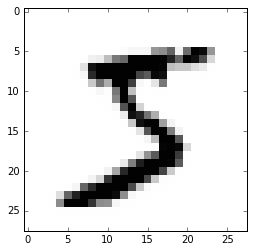

In [42]:
'''
Plot the hand written numbers
'''
all_values = mnist_train_list[0].split(',')
# Convert text string into real numbers and create an array of the numbers. Then wrap the list of numbers around every
# 28 elements to make a square matrix of 28 by 28
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
# Plot the hand written number
matplotlib.pyplot.imshow(image_array, cmap = 'Greys', interpolation = 'None')
'''
This hand written number has the label 5.
'''

'\nThis hand written number has the label 0.\n'

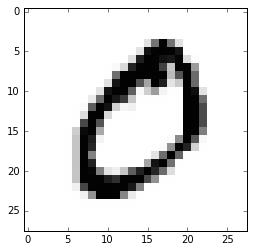

In [43]:
'''
Plot the hand written numbers
'''
all_values = mnist_train_list[1].split(',')
# Convert text string into real numbers and create an array of the numbers. Then wrap the list of numbers around every
# 28 elements to make a square matrix of 28 by 28
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
# Plot the hand written number
matplotlib.pyplot.imshow(image_array, cmap = 'Greys', interpolation = 'None')
'''
This hand written number has the label 0.
'''

## Step 3.2 Preparing MNIST data for training + training.##

Here we will do the following steps:

* Rescale the input color values from the 0-255 range to the 0.01-1.0 range(we can have 1.0 in our input range because we dont need to attain that value. It's for the outputs that we should avoid 1.0 as that is usually unattainable).
* We will do this by dividing the raw inputs which are in the 0-255 range by 255 to bring them to the 0-1 range, and then multiply them by 0.99 to bring them to the 0.01-0.99 range, and then we will add 0.01 to bring them to the 0.01-1.00 range.
* We will convert the target labels to 0.99
* We will convert the feature values to 0.01 so that the target for label '5' should look like [0.01, 0.01, 0.01, ... 0.99, 0.01, 0.01]

In [50]:
'''
Set up NN parameters
'''
# NN parameters
# There are 784 input features
input_nodes = 784
# We choose a number that is lower than the number of input features, so that the ANN is forced to summarize.
hidden_nodes = 100
# We set this to 10 as we have 10 output labels, 0 to 9.
output_nodes = 10

learning_rate = 0.3

# Instance of NN
n = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [51]:
'''
Prepare MNIST data for training and then train.
'''
# Epochs is the number of times the training data set is used for training
epochs = 5

for e in range(epochs):
    # Go through all records in the training data set
    for record in mnist_train_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        
        # Scale and Shift the inputs
        '''
        Dividing the raw inputs which are in the 0-255 range by 255 to bring them to the 0-1 range, 
        and then multiply them by 0.99 to bring them to the 0.01-0.99 range, 
        and then we will add 0.01 to bring them to the 0.01-1.00 range.
        '''
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        
        # Create the target output values (all 0.01, except the desired label which is 0.99)
        '''
        Create an array as long as the number of output nodes(10), and add 0.01 to each value for the features
        '''
        targets = numpy.zeros(output_nodes) + 0.01
        
        '''
        Set all targets to 0.99. all_values[0] is the target label for this record.
        '''
        targets[int(all_values[0])] = 0.99
        
        # Train the ANN
        n.train(inputs, targets)


## Step 3.3 Testing the ANN #

In [52]:
'''
Load the testing dataset
'''
mnist_test = open("mnist_test.csv", 'r')
mnist_test = mnist_test.readlines()

In [53]:
'''
Test the ANN on one record
'''
test_record = mnist_test[0].split(',')
print "Correct label: ", test_record[0]

# Get prediction
n.query((numpy.asfarray(test_record[1:]) / 255.0 * 0.99) + 0.01)

Correct label:  7


array([[ 0.00390606],
       [ 0.01178984],
       [ 0.0069336 ],
       [ 0.00318641],
       [ 0.01483875],
       [ 0.00587859],
       [ 0.01071865],
       [ 0.98245814],
       [ 0.00489811],
       [ 0.0186476 ]])

As we can see, we get the highest value: 0.9824 for the 8th index which is the value 7.

In [54]:
'''
Test the ANN on the entire training data set
'''
# Scorecard for how well the network performs, initially empty
scorecard = []

# Iterate though 10,000 rows
for record in mnist_test:
    # Split the record by the ',' commas
    all_values = record.split(',')
    
    # Correct answer is first value
    correct_label = int(all_values[0])
    
    # Scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    
    # Query the network
    outputs = n.query(inputs)
    
    # The index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    
    # append correct or incorrect to list
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)

In [62]:
print scorecard

[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

## Step 3.3: Improving performance ##

Performance tweaks can be done by:

* **Changing the learning rate:**  Lower the the learning rate, smaller the steps in the stochastic gradient, longer it takes for the ANN to converge, but we are likely to get a higher accuracy.
* **Change the number of epochs:** - doing multiple runs with the training set. If this is too high we risk overfitting the data. 
* ** Changing the number of hidden layers:** - the hidden layer is where the learning happens. Finding the right number of hidden layers ties into a limit called the learning capacity. If the number of hidden layers is too low, then the model won't have enough space to learn and if it is too high ther are too many options for the direction that the learning can take.

## Step 3.4: Overall model performance ##

In [71]:
from __future__ import division

scorecard_array = numpy.asarray(scorecard)
print "ANN Performance = ", float(scorecard_array.sum() / scorecard_array.size)*100

ANN Performance =  94.74
